**Nama: Muhammad Al Fikri**

**Asal Instansi: STT Terpadu Nurul Fikri**

**Grup SIB: M04**

In [ ]:
# import library TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [ ]:
# import splitfolders untuk membagi dataset
!pip install split-folders

import splitfolders
splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', 'rps/rockpaperscissors/data', seed=1, ratio=(0.6,0.4))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 2188 files [00:00, 2410.09 files/s]


In [ ]:
# membagi dataset menjadi train set dan val set
base_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

['scissors', 'paper', 'rock']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
    
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size = (150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32,
        # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode = 'categorical'
        )

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size = 32, 
        # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode = 'categorical'
        )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# menambahkan optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# menambahkan fitur callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("Akurasi minimum sudah tercapai (95%)")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# melakukan proses training model
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/25
25/25 - 44s - loss: 1.3172 - accuracy: 0.4100 - val_loss: 0.9769 - val_accuracy: 0.6250 - 44s/epoch - 2s/step
Epoch 2/25
25/25 - 45s - loss: 0.7876 - accuracy: 0.6875 - val_loss: 0.6087 - val_accuracy: 0.7937 - 45s/epoch - 2s/step
Epoch 3/25
25/25 - 42s - loss: 0.5417 - accuracy: 0.7887 - val_loss: 0.3713 - val_accuracy: 0.8875 - 42s/epoch - 2s/step
Epoch 4/25
25/25 - 42s - loss: 0.3270 - accuracy: 0.8725 - val_loss: 0.3734 - val_accuracy: 0.8375 - 42s/epoch - 2s/step
Epoch 5/25
25/25 - 41s - loss: 0.2952 - accuracy: 0.8875 - val_loss: 0.3692 - val_accuracy: 0.8500 - 41s/epoch - 2s/step
Epoch 6/25
25/25 - 41s - loss: 0.2599 - accuracy: 0.9100 - val_loss: 0.1455 - val_accuracy: 0.9625 - 41s/epoch - 2s/step
Epoch 7/25
25/25 - 41s - loss: 0.2067 - accuracy: 0.9287 - val_loss: 0.2107 - val_accuracy: 0.9125 - 41s/epoch - 2s/step
Epoch 8/25
25/25 - 43s - loss: 0.2054 - accuracy: 0.9337 - val_loss: 0.2300 - val_accuracy: 0.9312 - 43s/epoch - 2s/step
Epoch 9/25
25/25 - 41s - loss: 0

Saving 2affjOmZChc9AXpR.png to 2affjOmZChc9AXpR (1).png
2affjOmZChc9AXpR.png
rock


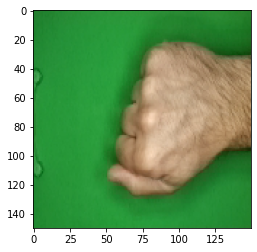

In [ ]:
# proses upload gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # melakukan prediksi gambar
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')